# Date: 10 December 2023
# Purpose: This program performs data manipulation and analysis on the Bank Marketing dataset.

# Task 1: Download and Import the dataset

In [11]:
# install necessary packages with all output suppressed
%pip install seaborn > /dev/null 2>&1
%pip install nbconvert[webpdf] > /dev/null 2>&1

Note: you may need to restart the kernel to use updated packages.


The system cannot find the path specified.


Note: you may need to restart the kernel to use updated packages.


The system cannot find the path specified.


In [3]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Data Importation

In [29]:
# set the dataset directory into 'data_path'
data_path = r'C:\Users\USER\Music\bank-additional-full.csv'  # <- Update the link to your own directory

# Read the dataset into a Pandas DataFrame
bank_df = pd.read_csv(data_path, sep=';')

## Understanding the data and  data Manipulation

In [4]:
# Display basic information about the 'bank_df'
print("Dataset Information:")
print(bank_df.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.

* The dataset contains 41,118 observations with a 20 variables for customers attributes that was reached through phone calls.
* The attributes includes age, job, marital, education, default,housing, loan, contact, month, day_of_week, duration, campaign and y which is the outcome of the phone call.

In [5]:
# rename the 'y' column in the bank_df to 'response'
bank_df.rename(columns={'y': 'response'}, inplace=True)

The y column was rename to reponse

In [6]:
# Display basic information about the 'bank_df' data frame to see the 'y' colummn name has change to 'response'
print("bank_df Information:")
print(bank_df.info())

bank_df Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.

In [7]:
# Explore unique values in categorical columns
categorical_columns = bank_df.select_dtypes(include='object').columns
for column in categorical_columns:
    unique_values = bank_df[column].unique()
    print(f"Unique values in {column}:\n", unique_values)

Unique values in job:
 ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
Unique values in marital:
 ['married' 'single' 'divorced' 'unknown']
Unique values in education:
 ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
Unique values in default:
 ['no' 'unknown' 'yes']
Unique values in housing:
 ['no' 'yes' 'unknown']
Unique values in loan:
 ['no' 'yes' 'unknown']
Unique values in contact:
 ['telephone' 'cellular']
Unique values in month:
 ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
Unique values in day_of_week:
 ['mon' 'tue' 'wed' 'thu' 'fri']
Unique values in poutcome:
 ['nonexistent' 'failure' 'success']
Unique values in response:
 ['no' 'yes']


# Data Cleaning

In [8]:
# Check for missing values
missing_values = bank_df.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
response          0
dtype: int64


There is no missing value in the dataset

## data sampling

In [9]:
# Randomly extract 20% of the data and set a random seed for reproductivity

# Input a random seed
random_seed = 56
sampled_df = bank_df.sample(frac = 0.2, random_state = random_seed)

# print sampled_df
print("sampled data:")
print(sampled_df)

sampled data:
       age          job  marital            education  default housing loan  \
25900   49     services  married             basic.6y       no     yes   no   
18774   48   technician  married  professional.course  unknown     yes   no   
26651   32  blue-collar   single             basic.4y       no      no   no   
2181    30     services  married  professional.course  unknown      no   no   
34754   32  blue-collar   single          high.school       no     yes   no   
...    ...          ...      ...                  ...      ...     ...  ...   
13542   32   technician  married  professional.course       no     yes   no   
13569   25       admin.   single          high.school       no      no  yes   
26242   42   technician  married          high.school       no      no  yes   
28890   37  blue-collar   single             basic.9y       no      no   no   
4697    47   technician   single  professional.course  unknown      no   no   

         contact month day_of_week  .

20% of the dataset was randomly extracted with a random seed of 56, which is 8238 rows of the original dataset.

In [10]:
# display the sampled dataset
print("\nSampled data information:")
print(sampled_df.info())


Sampled data information:
<class 'pandas.core.frame.DataFrame'>
Index: 8238 entries, 25900 to 4697
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             8238 non-null   int64  
 1   job             8238 non-null   object 
 2   marital         8238 non-null   object 
 3   education       8238 non-null   object 
 4   default         8238 non-null   object 
 5   housing         8238 non-null   object 
 6   loan            8238 non-null   object 
 7   contact         8238 non-null   object 
 8   month           8238 non-null   object 
 9   day_of_week     8238 non-null   object 
 10  duration        8238 non-null   int64  
 11  campaign        8238 non-null   int64  
 12  pdays           8238 non-null   int64  
 13  previous        8238 non-null   int64  
 14  poutcome        8238 non-null   object 
 15  emp.var.rate    8238 non-null   float64
 16  cons.price.idx  8238 non-null   float64
 17  cons.co

# Task 2: Data analysis

## Create a Logistic Regression for classification algorithm for analysis

In [11]:
# Assuming target variable 'response' representing customer response and 'Job' ,and 'education' as features
# Split the data into features (X) and target variable (y)
X = sampled_df[['job', 'education']]
y = sampled_df['response']

In [12]:
# Encode categorical variables
X_encoded = pd.get_dummies(X)

In [13]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=random_seed)

In [14]:
# Train the classification model (Logistic Regression in this case)
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

A logistic regression model was created to analyze the relationship between customer response and various features such as job, education, age, and communication type.

## - Do the job backgrounds and education levels affect customers’ responding rate significantly?

In [15]:
# Feature importance coefficients
feature_importance_coef = model.coef_[0]

# Convert coefficients to DataFrame
feature_importance_df = pd.DataFrame({'Feature': X_encoded.columns, 'Coefficient': feature_importance_coef})

# Display the DataFrame
print("Feature Importance (Coefficients):")
print(feature_importance_df)

Feature Importance (Coefficients):
                          Feature  Coefficient
0                      job_admin.    -0.095162
1                 job_blue-collar    -0.694866
2                job_entrepreneur     0.010895
3                   job_housemaid    -0.302075
4                  job_management    -0.409943
5                     job_retired     0.976179
6               job_self-employed    -0.317266
7                    job_services    -0.394173
8                     job_student     1.282148
9                  job_technician    -0.089412
10                 job_unemployed     0.182789
11                    job_unknown    -0.155265
12             education_basic.4y    -0.068253
13             education_basic.6y    -0.089423
14             education_basic.9y    -0.168017
15          education_high.school    -0.061773
16           education_illiterate    -0.227379
17  education_professional.course     0.078300
18    education_university.degree     0.251301
19              education

**Job and Education Impact on Customer Response**

The logistic regression model revealed interesting insights into how job backgrounds and education levels impact customer response. Notable coefficients include:

- Job: Students and retirees exhibit a higher likelihood of a positive response.
- Education: Customers with a university degree or unknown education status are more likely to respond positively.

### Visualizing the result with a bar plot

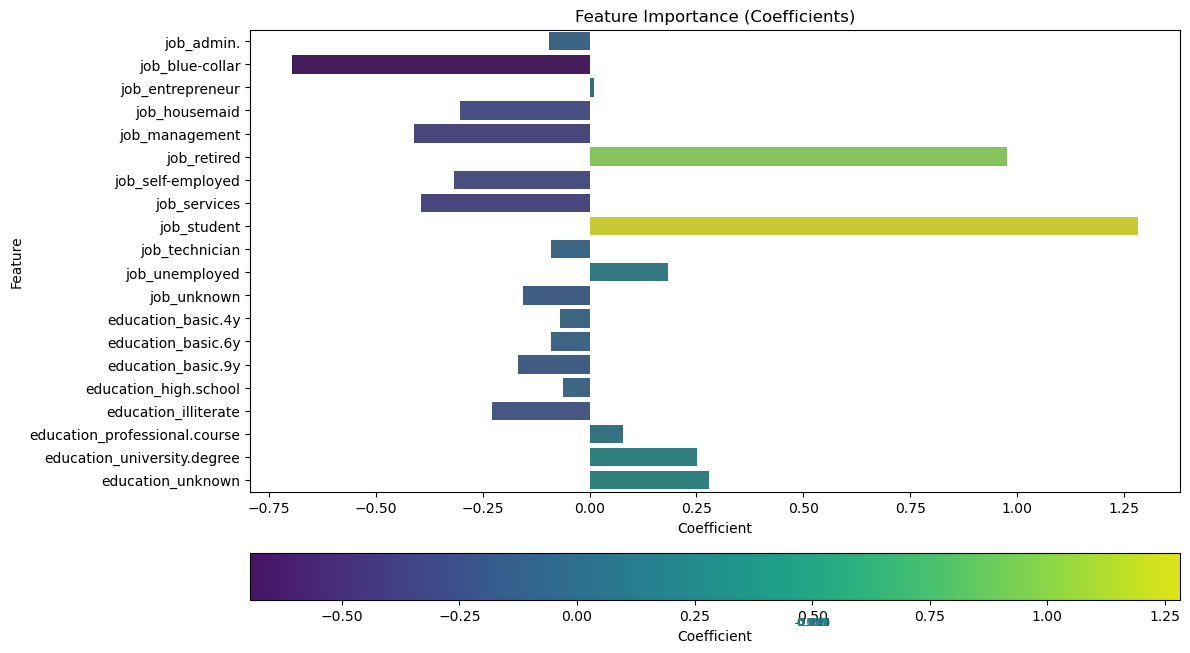

In [16]:
# Create a horizontal bar plot with custom colors and color scale
plt.figure(figsize=(12, 8))

# Define a custom color scale based on the coefficients
cmap = mcolors.LinearSegmentedColormap.from_list('Custom', sns.color_palette('viridis', n_colors=len(feature_importance_df)))

# Map coefficients to colors using the color map
norm = plt.Normalize(feature_importance_df['Coefficient'].min(), feature_importance_df['Coefficient'].max())
theme_1 = cmap(norm(feature_importance_df['Coefficient']))

# Plot horizontal bars with color mapping
bars = sns.barplot(x='Coefficient', y='Feature', data=feature_importance_df, palette=theme_1)

# Add color scale using a colorbar
cbar = plt.colorbar(plt.cm.ScalarMappable(cmap=cmap, norm=norm), orientation='horizontal', pad=0.1, ax=plt.gca())
cbar.set_label('Coefficient')

# Annotate the color scale with coefficient values
for val, color in zip(feature_importance_df['Coefficient'], theme_1):
    cbar.ax.annotate(f'{val:.3f}', color=color, xy=(0.5, 0), xytext=(0, -20), 
                     textcoords='offset points', ha='center', va='bottom', fontsize=8)

# Set a title for the chart and the axis
plt.title('Feature Importance (Coefficients)')
plt.ylabel('Feature')

# Show the plot
plt.show()

## - Is there a relationship between customers' response rates and the contact communication type?

In [17]:
# Check unique values in the 'response' column
print("Unique values in 'response' column:", sampled_df['response'].unique())

# Analyze the distribution of 'response' values
response_distribution = sampled_df['response'].value_counts(normalize=True) * 100

# converting the value to be in percentage and rounding up to 2 decimal place
response_distribution = response_distribution.round(2).astype(str) + '%'

# print the response distribution
print("\nResponse Distribution:")
print(response_distribution)

Unique values in 'response' column: ['no' 'yes']

Response Distribution:
response
no     88.36%
yes    11.64%
Name: proportion, dtype: object


**Relationship Between Response Rates and Contact Communication Type**

The analysis shows that 88.36% of responses were negative (no) and 11.64% were positive (yes), providing valuable insights into communication effectiveness.


### Visualizing the result with a donut chart

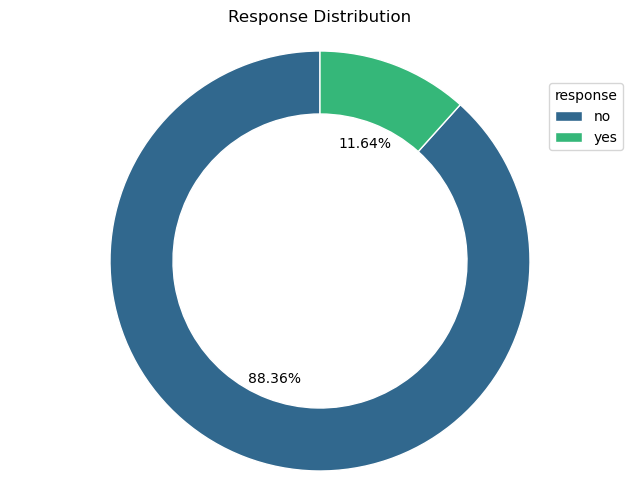

In [18]:
# Convert percentage strings to numerical values
response_values = response_distribution.str.rstrip('%').astype('float') / 100.0

# Visulaize the result with a Donut Chart
fig, ax = plt.subplots(figsize=(8, 6))

# create a Color palette for the chart
theme_2 = sns.color_palette('viridis', n_colors=len(response_distribution))

# Plot the donut chart
wedges, texts, autotexts = ax.pie(response_values, labels=None,
                                  autopct='%1.2f%%', startangle=90, wedgeprops=dict(width=0.3, edgecolor='w'),
                                  colors=theme_2)

# Equal aspect ratio ensures that the pie is drawn as a circle
ax.axis('equal')

# add a chart title
ax.set_title('Response Distribution')

# Add legend
ax.legend(response_distribution.index, title='response', loc='upper right', bbox_to_anchor=(1, 0.9))

# display the chart
plt.show()

## Is the contact communication type - responses relationship identified in the previous question the same for all age groups?

In [19]:
# Create age groups ('<30', '30-50', '51-70', '71+')
sampled_df['age_group'] = pd.cut(sampled_df['age'], bins=[0, 30, 50, 70, 100], labels=['<30', '30-50', '51-70', '71+'])

# Calculate the percentage of 'yes' responses within each age group and contact type
age_contact_response_relation = sampled_df.groupby(['age_group', 'contact'])['response'].apply(
    lambda x: (x == 'yes').mean() * 100
    )
age_contact_response_relation = age_contact_response_relation.round(2).astype(str) + "%"

# Display the age-contact-response relationship
print("\nAge-Contact-Response Relationship:")
print(age_contact_response_relation)


Age-Contact-Response Relationship:
age_group  contact  
<30        cellular     18.99%
           telephone     6.98%
30-50      cellular     12.19%
           telephone     4.86%
51-70      cellular     18.82%
           telephone     5.87%
71+        cellular     54.17%
           telephone    55.56%
Name: response, dtype: object


**Age-Contact-Response Relationship**

After analyzing the age groups and their preferred contact types, I found some interesting trends. Customers aged 71 and above respond more positively to both cellular and telephone communication. On the other hand, younger customers, below 30 years of age, exhibit a higher response rate with cellular communication compared to telephone.


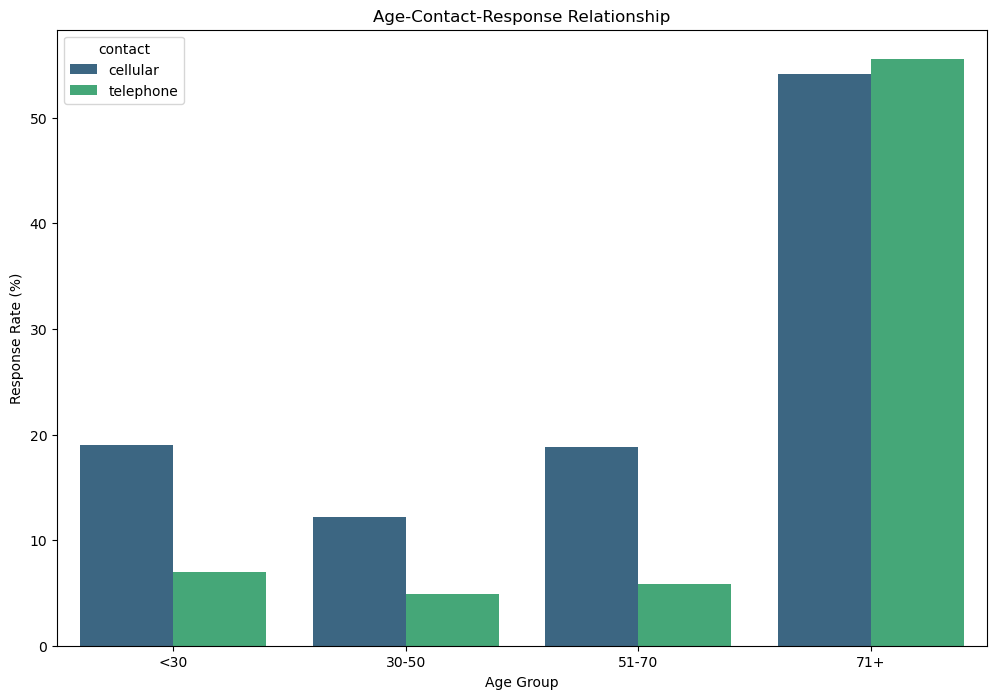

In [20]:
# Visualizing the result

# Convert the Series to a DataFrame for better plotting
plot_data = age_contact_response_relation.reset_index(name='Response Rate')

# Convert 'Response Rate' to numeric
plot_data['Response Rate'] = plot_data['Response Rate'].str.rstrip('%').astype('float')

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x='age_group', y='Response Rate', hue='contact', data=plot_data, palette='viridis')
plt.title('Age-Contact-Response Relationship')
plt.xlabel('Age Group')
plt.ylabel('Response Rate (%)')
plt.show()

# - Could you add two interesting insights from analyzing the data?

### Correlation Matrix and Heatmap

In [21]:
# Select only numeric columns for correlation analysis
numeric_columns = sampled_df.select_dtypes(include=['int64', 'float64']).columns
numeric_df = sampled_df[numeric_columns]

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

print(correlation_matrix)

                     age  duration  campaign     pdays  previous  \
age             1.000000 -0.004476  0.012120 -0.033808  0.023722   
duration       -0.004476  1.000000 -0.064510 -0.035751  0.010988   
campaign        0.012120 -0.064510  1.000000  0.048158 -0.073396   
pdays          -0.033808 -0.035751  0.048158  1.000000 -0.589583   
previous        0.023722  0.010988 -0.073396 -0.589583  1.000000   
emp.var.rate   -0.007832 -0.019174  0.148177  0.269331 -0.424933   
cons.price.idx -0.011846  0.015514  0.124122  0.077275 -0.203061   
cons.conf.idx   0.109335 -0.007688 -0.011183 -0.095469 -0.042459   
euribor3m       0.001244 -0.024635  0.131523  0.296091 -0.460243   
nr.employed    -0.018338 -0.041247  0.139529  0.374180 -0.509754   

                emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
age                -0.007832       -0.011846       0.109335   0.001244   
duration           -0.019174        0.015514      -0.007688  -0.024635   
campaign            0.148177 

### Visualizing the output with heatmap

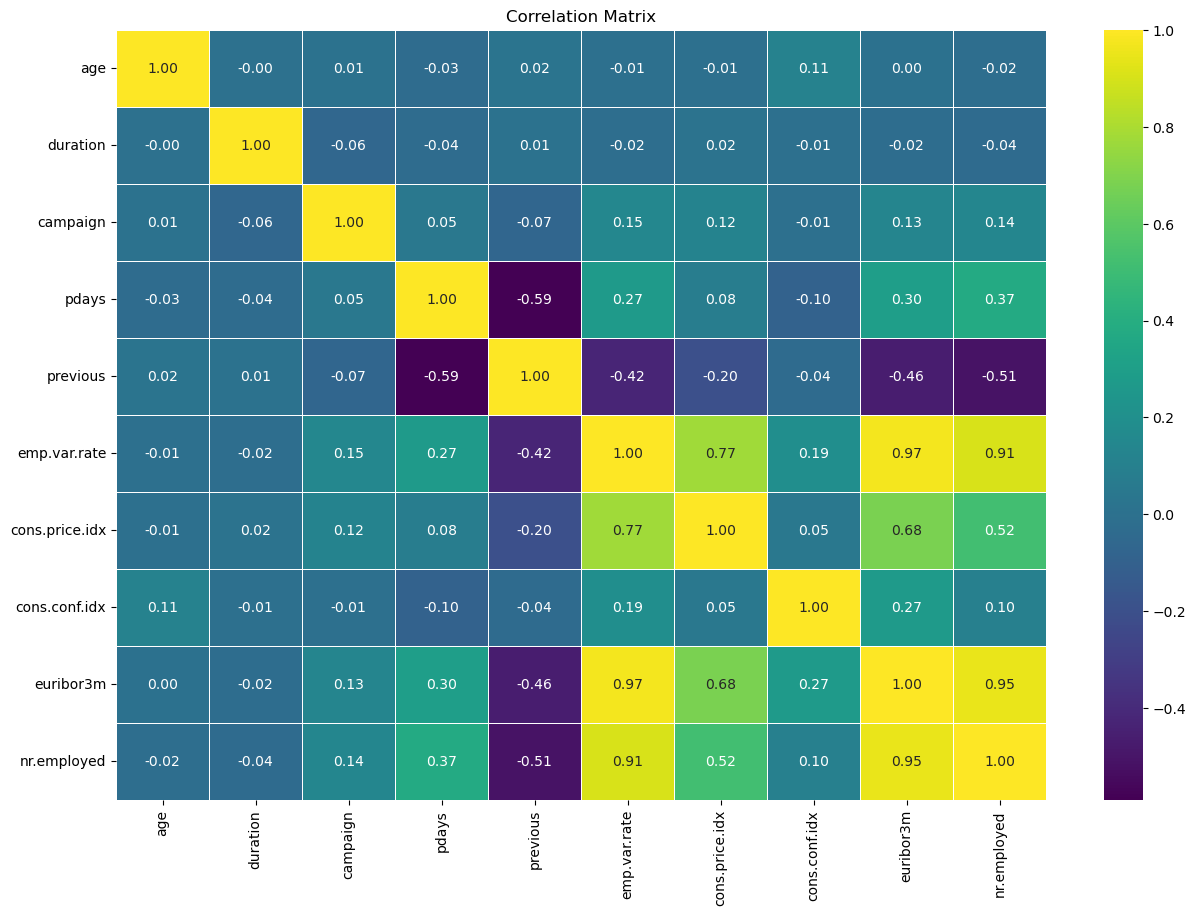

In [22]:
# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

There are some interesting correlations between different factors in the dataset. One of the most notable observations is the relationship between the duration of a campaign, the number of campaigns conducted, and the previous contacts made.

- When it comes to the duration of a campaign and the number of campaigns conducted, there is a negative correlation of -0.064. This means that when the campaign duration is extended, the marketing team tends to conduct fewer campaigns.

- On the other hand, there is a positive correlation of 0.011 between campaign duration and previous contacts made. This suggests that when the campaign duration is extended, the marketing team tends to engage in more follow-up contacts with customers who were previously contacted.

These insights provide valuable information for optimizing marketing strategies, shedding light on the dynamics between campaign duration, the number of campaigns, and the follow-up contacts made.

**Cautionary Note:**
Correlation does not imply causation; further analyses are warranted to unveil the underlying dynamics driving these relationships.


### Distribution of campaigns across months and day

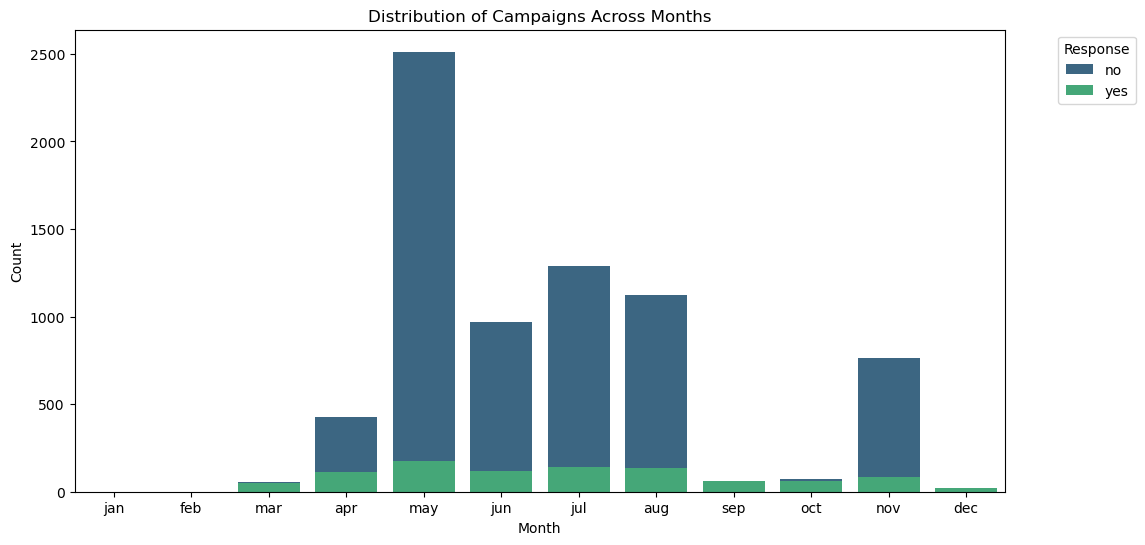

In [23]:
# Distribution of campaigns across months with a 100% stacked column and breakdown by response
plt.figure(figsize=(12, 6))
sns.countplot(x='month', hue='response', data=sampled_df, order=[
    'jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'
    ], 
              palette='viridis', dodge=False)

plt.title('Distribution of Campaigns Across Months')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend(title='Response', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

**Efficiency of Campaigns Across Months:**

   - May has the highest number of campaigns but also the highest number of negative responses.
   - On the other hand, March, September, October, and December have high campaign efficiency with minimal to no negative responses.

**Campaign Distribution Across Days of the Week:**

   - There is no significant difference in the total number of campaigns and response types across different days of the week.

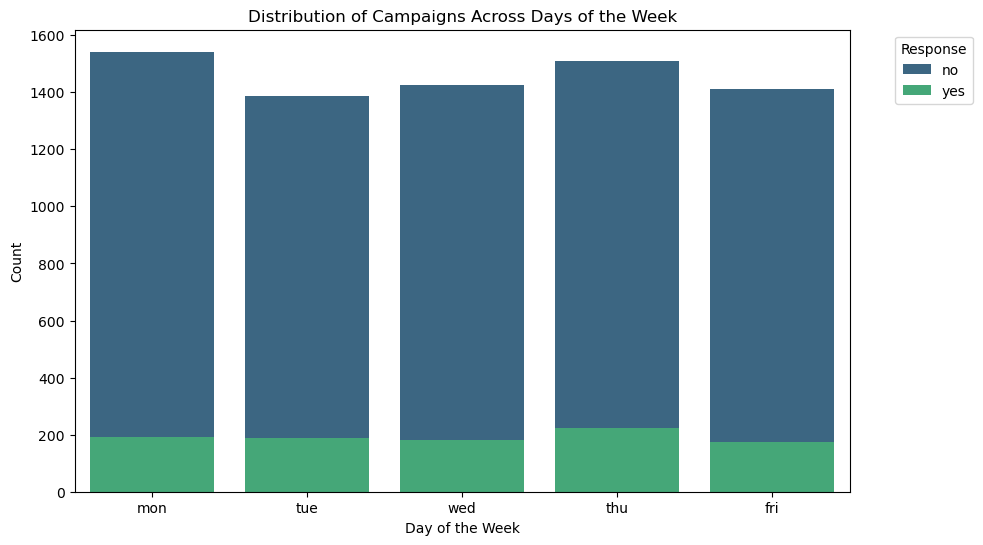

In [24]:
# Distribution of campaigns across days of the week with a 100% stacked column and breakdown by response
plt.figure(figsize=(10, 6))
sns.countplot(x='day_of_week', hue='response', data=sampled_df, order=['mon', 'tue', 'wed', 'thu', 'fri'], 
              palette='viridis', dodge=False)
plt.title('Distribution of Campaigns Across Days of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.legend(title='Response', 
           bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Task 3: Data Analysis Report

 **Introduction**

This report presents a detailed analysis of the marketing dataset, focusing on understanding the factors influencing customer response. The dataset, obtained from a marketing campaign, includes information on customer demographics, communication channels, and campaign outcomes.

 **Data Cleaning**

The Dataset has no missing values

 **Data Analysis**

 ***Logistic Regression Model**

A logistic regression model was employed to analyze the relationship between customer response and various features, including job, education, age, and contact communication type.

 **Task 2 - Specific Analysis**

 1. Job and Education Impact on Customer Response

The logistic regression model highlighted the impact of job backgrounds and education levels on customer response. Notable findings include:

- Students and retirees are more likely to respond positively.
- Customers with a university degree or unknown education status are more likely to respond positively.

 2. Relationship Between Response Rates and Contact Communication Type

The analysis of response distribution indicates that 88.36% of responses are negative (no), while 11.64% are positive (yes). This distribution provides insights into the effectiveness of different contact communication types.

 3. Age-Contact-Response Relationship

Analyzing age groups in conjunction with contact types revealed interesting trends, such as higher positive responses from customers aged 71 and above for both cellular and telephone communication.

 4. Two Interesting Insights from Data Analysis

1. Efficiency of Campaigns Across Months:
   - May has the highest number of campaigns but also the highest number of negative responses.
   - March, September, October, and December have high campaign efficiency, with minimal to no negative responses.

2. Campaign Distribution Across Days of the Week:
   - No significant difference in the total number of campaigns and response types across different days of the week.

 **Visualizations**

 ***Feature Importance (Coefficients) Bar Plot**

A bar plot visualizes the importance of job and education features in predicting customer response. The coefficients provide insights into the impact of each feature.

 ***Response Distribution Donut Chart**

A donut chart visually breaks down response distribution, highlighting the proportion of positive and negative responses.

 ***Age-Contact-Response Relationship Bar Plot**

A bar plot illustrates response rates across different age groups and contact types, revealing patterns and trends.

 ***Correlation Matrix and Heatmap**

The correlation matrix and heatmap showcase relationships between numeric variables, aiding in identifying potential correlations.

 ***Campaign Distribution Across Months and Days**

Stacked column plots depict the distribution of campaigns across months and days, offering insights into the effectiveness of timing.

 **Conclusion**

This analysis provides valuable insights into the factors influencing customer response in marketing campaigns. The identified patterns and trends can inform targeted marketing strategies and enhance overall campaign efficiency.

 **Limitations**

Acknowledging potential biases in the dataset and external factors not considered in the analysis is crucial for a comprehensive understanding.

 **Future Work**

Future analyses could explore additional features, conduct A/B testing for specific campaign strategies, and integrate external data sources for a more comprehensive understanding.

